___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Get the Data

**Read the 'KNN_Project_Data csv file into a dataframe**

In [43]:
df = pd.read_csv('KNN_Project_Data')
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace(" ", "_")

**Check the head of the dataframe.**

In [44]:
df.head()

,xvpm,gwyh,trat,tllz,igga,hykr,edfs,guub,mgjm,jhzc,target_class
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

/home/karlo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/karlo/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/karlo/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/karlo/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


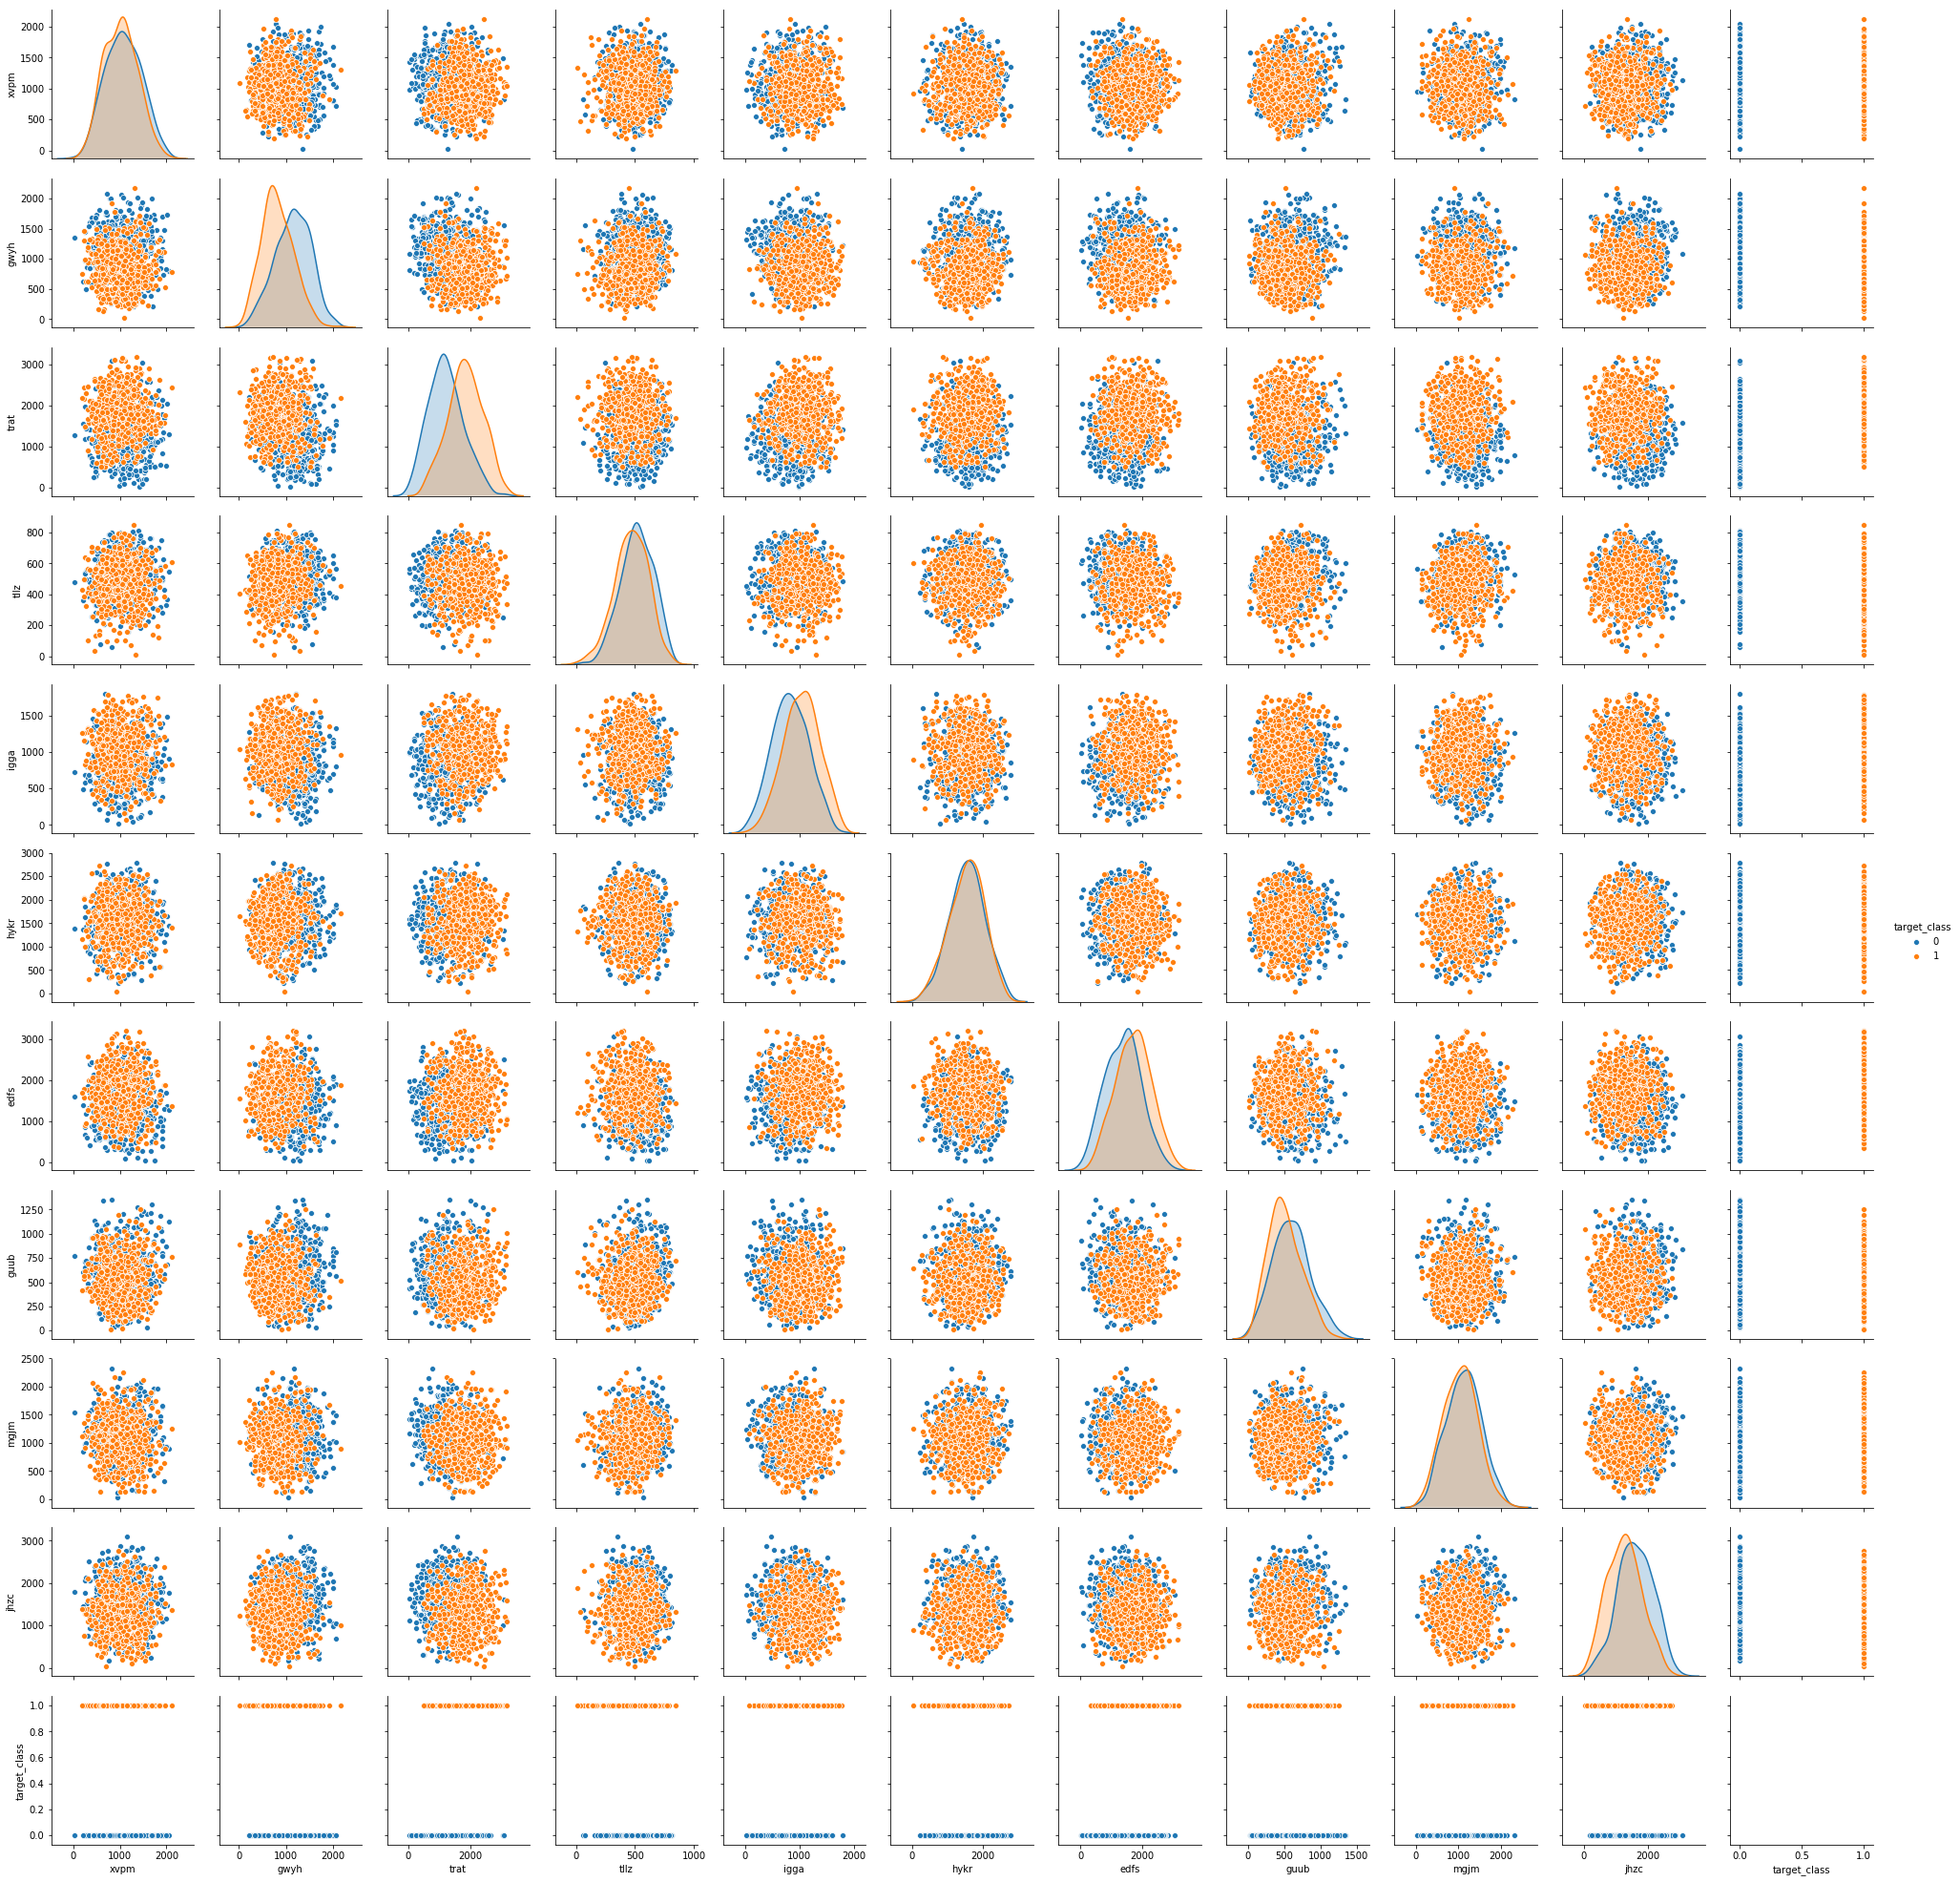

In [45]:
sns.pairplot(df, hue='target_class')

# Standardize the Variables

Time to standardize the variables.

**Import StandardScaler from Scikit learn.**

**Create a StandardScaler() object called scaler.**

In [46]:
scaler = StandardScaler()

**Fit scaler to the features.**

In [47]:
scaler.fit(df.drop('target_class', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [48]:
scaled_features = scaler.transform(df.drop('target_class', axis=1))
scaled_features

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [49]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,xvpm,gwyh,trat,tllz,igga,hykr,edfs,guub,mgjm,jhzc
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [50]:
# check mean
df_feat.mean().round()

xvpm    0.0
gwyh    0.0
trat    0.0
tllz    0.0
igga   -0.0
hykr   -0.0
edfs   -0.0
guub   -0.0
mgjm   -0.0
jhzc    0.0
dtype: float64

In [51]:
# check sd
df_feat.std().round()

xvpm    1.0
gwyh    1.0
trat    1.0
tllz    1.0
igga    1.0
hykr    1.0
edfs    1.0
guub    1.0
mgjm    1.0
jhzc    1.0
dtype: float64

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [52]:
X = df_feat
y = df['target_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

**Create a KNN model instance with n_neighbors=1**

In [53]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [54]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [55]:
pred = knn.predict(X_test)

**Create a confusion matrix and classification report.**

In [56]:
print(confusion_matrix(y_test, pred))

[[105  58]
 [ 35 102]]


In [57]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       163
           1       0.64      0.74      0.69       137

   micro avg       0.69      0.69      0.69       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.70      0.69      0.69       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

**Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [58]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))    

**Now create the following plot using the information from your for loop.**

Text(0, 0.5, 'Error rate')

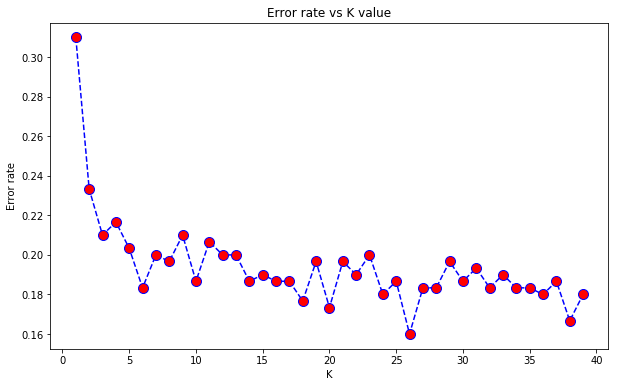

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs K value')
plt.xlabel('K')
plt.ylabel('Error rate')

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [61]:
knn = KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[133  30]
 [ 18 119]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       163
           1       0.80      0.87      0.83       137

   micro avg       0.84      0.84      0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



# Great Job!